<a href="https://colab.research.google.com/github/hemant-mogia/loan-risk-classification/blob/main/loan_risk_classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_data(train_path, test_path):
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    return train, test

In [ ]:
import pandas as pd

# Load data
test, train  = load_data('/content/drive/MyDrive/bureau/Assignment_Test.csv', '/content/drive/MyDrive/bureau/Assignment_Train.csv')

In [ ]:
train.head()

,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,Cibil Score,...,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,106989,07/20/2022,DELHI-SF,DELHI,SUNIL,NaN,CHANDER,9210574080,NO,726,...,0.0,0.0,1.0,NaN,NaN,0.0,5324.0,67.222222,High,APPROVED
1,108975,07/28/2022,PATNA-SF,BIHAR,AMRIT,NaN,KUMAR,8877987018,NO,NaN,...,0.0,0.0,0.0,NaN,NaN,0.0,1998.0,100.000000,High,APPROVED
2,111004,07/15/2022,DARJEELING-SF,WEST BENGAL,ANIMESH,NaN,THAPA,8910862135,NO,737,...,0.0,0.0,0.0,NaN,NaN,0.0,-1.0,-1.000000,Low,APPROVED
3,192020,07/04/22,SAHARANPUR-SF,UTTAR PRADESH,ADITYA,NaN,SINGH,9758428017,NO,713,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,72.777778,High,APPROVED
4,55095,07/15/2022,MODASA-SF,GUJARAT,PARMAR,HARESHBHAI,AMRUTBHAI,9687028486,NO,669,...,0.0,0.0,1.0,NaN,NaN,0.0,1998.0,68.095238,High,DECLINED


In [ ]:
# List of columns to consider as features for training the model
train_cols_to_consider = [
    # Application Details
    # 'APPLICATION LOGIN DATE',
    'AADHAR VERIFIED',

    # Financial Information
    'Cibil Score',
    'TOTAL ASSET COST',
    'APPLIED AMOUNT',

    # Demographics
    'MARITAL STATUS',
    'GENDER',
    'DOB',
    'AGE',

    # Phone Related Features
    'phone_digitalage',
    'phone_nameMatchScore',
    'phone_phoneFootprintStrengthOverall'

    # Target Variable
    'Application Status'
]

In [ ]:
print(train.columns.tolist())


['DEALER ID', 'APPLICATION LOGIN DATE', 'HDB BRANCH NAME', 'HDB BRANCH STATE', 'FIRST NAME', 'MIDDLE NAME', 'LAST NAME', 'mobile', 'AADHAR VERIFIED', 'Cibil Score', 'MOBILE VERIFICATION', 'DEALER NAME', 'TOTAL ASSET COST', 'ASSET CTG', 'ASSET MODEL NO', 'APPLIED AMOUNT', 'PRIMARY ASSET MAKE', 'Primary Asset Model No', 'Personal Email Address', 'MARITAL STATUS', 'GENDER', 'DOB', 'AGE', 'ADDRESS TYPE', 'EMPLOY CONSTITUTION', 'EMPLOYER NAME', 'EMPLOYER TYPE', 'Pan Name', 'name', 'vpa', 'upi_name', 'Phone Social Premium.a23games', 'Phone Social Premium.amazon', 'Phone Social Premium.byjus', 'Phone Social Premium.flipkart', 'Phone Social Premium.housing', 'Phone Social Premium.indiamart', 'Phone Social Premium.instagram', 'Phone Social Premium.isWABusiness', 'Phone Social Premium.jeevansaathi', 'Phone Social Premium.jiomart', 'Phone Social Premium.microsoft', 'Phone Social Premium.my11', 'Phone Social Premium.paytm', 'Phone Social Premium.rummycircle', 'Phone Social Premium.shaadi', 'Phone 

In [ ]:
# List of columns to consider as features for training the model
train_cols_to_consider = [
    # Application Details
    # 'APPLICATION LOGIN DATE',
    'AADHAR VERIFIED',

    # Financial Information
    'Cibil Score',
    'TOTAL ASSET COST',
    'APPLIED AMOUNT',

    # Demographics
    'MARITAL STATUS',
    'GENDER',
    'AGE',

    # Phone Related Features
    'phone_digitalage',
    'phone_nameMatchScore',
    'phone_phoneFootprintStrengthOverall',

    # Target Variable
    'Application Status'
]

# Check the existing columns
existing_columns = train.columns.tolist()
missing_columns = [col for col in train_cols_to_consider if col not in existing_columns]

if missing_columns:
    print(f"Columns missing from DataFrame: {missing_columns}")
else:
    # If all columns exist, create the DataFrame with selected columns
    train_df = train[train_cols_to_consider]
    print("Columns selected successfully.")


Columns selected successfully.


In [ ]:
train_df.head()

,AADHAR VERIFIED,Cibil Score,TOTAL ASSET COST,APPLIED AMOUNT,MARITAL STATUS,GENDER,AGE,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,NO,726,95041.0,85000,Married,Male,44,5324.0,67.222222,High,APPROVED
1,NO,NaN,NaN,90000,NaN,Male,25,1998.0,100.000000,High,APPROVED
2,NO,737,119436.0,75000,Single,Male,22,-1.0,-1.000000,Low,APPROVED
3,NO,713,87000.0,78500,Single,Male,24,1998.0,72.777778,High,APPROVED
4,NO,669,NaN,70000,NaN,Male,33,1998.0,68.095238,High,DECLINED


In [ ]:
pd.set_option('display.max_columns', None)
train_df.head(10)


,AADHAR VERIFIED,Cibil Score,TOTAL ASSET COST,APPLIED AMOUNT,MARITAL STATUS,GENDER,AGE,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,NO,726,95041.0,85000,Married,Male,44,5324.0,67.222222,High,APPROVED
1,NO,NaN,NaN,90000,NaN,Male,25,1998.0,100.000000,High,APPROVED
2,NO,737,119436.0,75000,Single,Male,22,-1.0,-1.000000,Low,APPROVED
3,NO,713,87000.0,78500,Single,Male,24,1998.0,72.777778,High,APPROVED
4,NO,669,NaN,70000,NaN,Male,33,1998.0,68.095238,High,DECLINED
5,NO,NaN,NaN,107000,NaN,Female,32,1998.0,73.015873,High,APPROVED
6,NO,NaN,112562.0,99999,Married,Male,30,750.0,100.000000,Medium,APPROVED
7,NO,762,NaN,102000,NaN,Male,0,1998.0,100.000000,High,DECLINED
8,NO,NaN,78120.0,72500,Married,Male,24,1998.0,79.411765,High,APPROVED
9,NO,NaN,109500.0,90000,Single,Male,25,1988.0,71.759259,High,APPROVED


In [ ]:
target = train_df['Application Status']

train_df = train_df.drop('Application Status', axis=1)

In [ ]:
target.value_counts()

,count
Application Status,
APPROVED,6677
DECLINED,3323


In [ ]:
target = target.map({'APPROVED': 1, 'DECLINED': 0})


In [ ]:
target.value_counts()

,count
Application Status,
1,6677
0,3323


In [ ]:
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])


Cibil Score                            4297
TOTAL ASSET COST                       5108
MARITAL STATUS                         4894
phone_digitalage                          4
phone_nameMatchScore                      4
phone_phoneFootprintStrengthOverall       6
dtype: int64


In [ ]:
print(train_df[['Cibil Score', 'TOTAL ASSET COST']].dtypes)


Cibil Score          object
TOTAL ASSET COST    float64
dtype: object


In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer

# Impute 'Single' for missing MARITAL_STATUS
train_df.loc[:, 'MARITAL STATUS'] = train_df['MARITAL STATUS'].fillna('Single')

# Convert columns to numeric
train_df.loc[:, 'Cibil Score'] = pd.to_numeric(train_df['Cibil Score'], errors='coerce')
train_df.loc[:, 'TOTAL ASSET COST'] = pd.to_numeric(train_df['TOTAL ASSET COST'], errors='coerce')

# Create a new DataFrame for the columns to be imputed
impute_df = train_df[['Cibil Score', 'TOTAL ASSET COST']].copy()

# KNN imputer for Cibil Score and TOTAL ASSET COST
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(impute_df)

# Assign the imputed values back to the original DataFrame
train_df.loc[:, ['Cibil Score', 'TOTAL ASSET COST']] = imputed_values


In [ ]:
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])


phone_digitalage                       4
phone_nameMatchScore                   4
phone_phoneFootprintStrengthOverall    6
dtype: int64


In [ ]:
# Convert columns to numeric
train_df.loc[:, 'phone_digitalage'] = pd.to_numeric(train_df['phone_digitalage'], errors='coerce')
train_df.loc[:, 'phone_nameMatchScore'] = pd.to_numeric(train_df['phone_nameMatchScore'], errors='coerce')

# Interpolation for missing values
train_df.loc[:, 'phone_digitalage'] = train_df['phone_digitalage'].interpolate()
train_df.loc[:, 'phone_nameMatchScore'] = train_df['phone_nameMatchScore'].interpolate()
train_df['phone_phoneFootprintStrengthOverall'] = train_df['phone_phoneFootprintStrengthOverall'].astype('object')
train_df['phone_phoneFootprintStrengthOverall'] = train_df['phone_phoneFootprintStrengthOverall'].fillna('Low')

In [ ]:
train_df['Cibil Score'] = train_df['Cibil Score'].astype('float64')


In [ ]:
train_df.head()

,AADHAR VERIFIED,Cibil Score,TOTAL ASSET COST,APPLIED AMOUNT,MARITAL STATUS,GENDER,AGE,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,NO,726.000000,95041.000000,85000,Married,Male,44,5324.0,67.222222,High
1,NO,706.402118,97612.518397,90000,Single,Male,25,1998.0,100.000000,High
2,NO,737.000000,119436.000000,75000,Single,Male,22,-1.0,-1.000000,Low
3,NO,713.000000,87000.000000,78500,Single,Male,24,1998.0,72.777778,High
4,NO,669.000000,93604.800000,70000,Single,Male,33,1998.0,68.095238,High


In [ ]:
print(train_df.isnull().sum())

AADHAR VERIFIED                        0
Cibil Score                            0
TOTAL ASSET COST                       0
APPLIED AMOUNT                         0
MARITAL STATUS                         0
GENDER                                 0
AGE                                    0
phone_digitalage                       0
phone_nameMatchScore                   0
phone_phoneFootprintStrengthOverall    0
dtype: int64


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   AADHAR VERIFIED                      10000 non-null  object 
 1   Cibil Score                          10000 non-null  float64
 2   TOTAL ASSET COST                     10000 non-null  float64
 3   APPLIED AMOUNT                       10000 non-null  int64  
 4   MARITAL STATUS                       10000 non-null  object 
 5   GENDER                               10000 non-null  object 
 6   AGE                                  10000 non-null  int64  
 7   phone_digitalage                     10000 non-null  float64
 8   phone_nameMatchScore                 10000 non-null  float64
 9   phone_phoneFootprintStrengthOverall  10000 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 781.4+ KB


In [ ]:
# Select columns with object data type
pd.set_option('display.max_columns', None)
object_columns = train_df.select_dtypes(include='object')

In [ ]:
object_columns

,AADHAR VERIFIED,MARITAL STATUS,GENDER,phone_phoneFootprintStrengthOverall
0,NO,Married,Male,High
1,NO,Single,Male,High
2,NO,Single,Male,Low
3,NO,Single,Male,High
4,NO,Single,Male,High
...,...,...,...,...
9995,NO,Married,Male,Medium
9996,NO,Married,Male,High
9997,NO,Married,Male,Medium
9998,NO,Married,Male,Low


In [ ]:
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   AADHAR VERIFIED                      10000 non-null  object
 1   MARITAL STATUS                       10000 non-null  object
 2   GENDER                               10000 non-null  object
 3   phone_phoneFootprintStrengthOverall  10000 non-null  object
dtypes: object(4)
memory usage: 312.6+ KB


In [ ]:
# Use value_counts() on each column
for col in object_columns.columns:
  print(f"\nUnique Value Counts for Column '{col}':")
  print(object_columns[col].value_counts())


Unique Value Counts for Column 'AADHAR VERIFIED':
AADHAR VERIFIED
NO    10000
Name: count, dtype: int64

Unique Value Counts for Column 'MARITAL STATUS':
MARITAL STATUS
Single     6167
Married    3833
Name: count, dtype: int64

Unique Value Counts for Column 'GENDER':
GENDER
Male      8408
Female    1592
Name: count, dtype: int64

Unique Value Counts for Column 'phone_phoneFootprintStrengthOverall':
phone_phoneFootprintStrengthOverall
Medium       4599
High         4141
Low          1185
Very High      44
Very Low       31
Name: count, dtype: int64


In [ ]:
# Select columns with object data type
pd.set_option('display.max_columns', None)
num_columns = train_df.select_dtypes(include='float64')

In [ ]:
num_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cibil Score           10000 non-null  float64
 1   TOTAL ASSET COST      10000 non-null  float64
 2   phone_digitalage      10000 non-null  float64
 3   phone_nameMatchScore  10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder
le = LabelEncoder()

# Label encode object columns
encoded_object_df = object_columns.copy()
for col in object_columns.columns:
    encoded_object_df[col] = le.fit_transform(object_columns[col])

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(num_columns), columns=num_columns.columns)

# Combine encoded object columns with scaled numerical columns
final_df = pd.concat([encoded_object_df, scaled_numerical_df], axis=1)

# Display the updated DataFrame
print(final_df.head())

   AADHAR VERIFIED  MARITAL STATUS  GENDER  \
0                0               0       1   
1                0               1       1   
2                0               1       1   
3                0               1       1   
4                0               1       1   

   phone_phoneFootprintStrengthOverall  Cibil Score  TOTAL ASSET COST  \
0                                    0     0.237096         -0.177271   
1                                    0    -0.163028          0.027431   
2                                    1     0.461680          1.764659   
3                                    0    -0.028321         -0.817364   
4                                    0    -0.926656         -0.291598   

   phone_digitalage  phone_nameMatchScore  
0          3.730830              0.275426  
1          0.350731              1.053963  
2         -1.680783             -1.344988  
3          0.350731              0.407381  
4          0.350731              0.296161  


In [ ]:
final_df.head()

,AADHAR VERIFIED,MARITAL STATUS,GENDER,phone_phoneFootprintStrengthOverall,Cibil Score,TOTAL ASSET COST,phone_digitalage,phone_nameMatchScore
0,0,0,1,0,0.237096,-0.177271,3.730830,0.275426
1,0,1,1,0,-0.163028,0.027431,0.350731,1.053963
2,0,1,1,1,0.461680,1.764659,-1.680783,-1.344988
3,0,1,1,0,-0.028321,-0.817364,0.350731,0.407381
4,0,1,1,0,-0.926656,-0.291598,0.350731,0.296161


In [ ]:
final_df.shape, target.shape

((10000, 8), (10000,))

In [ ]:
# for data processing and manipulation
import pandas as pd
import numpy as np

# scikit-learn modules for feature selection and model evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# libraries for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
X, Y = final_df, target

In [ ]:
def fit_model(X, Y):
    '''Use a RandomForestClassifier for this problem.'''

    # define the model to use
    model = RandomForestClassifier(criterion='entropy', random_state=47)

    # Train the model
    model.fit(X, Y)

    return model

In [ ]:
def calculate_metrics(model, X_test_scaled, Y_test):
    '''Get model evaluation metrics on the test set.'''

    # Get model predictions
    y_predict_r = model.predict(X_test_scaled)

    # Calculate evaluation metrics for assesing performance of the model.
    acc = accuracy_score(Y_test, y_predict_r)
    roc = roc_auc_score(Y_test, y_predict_r)
    prec = precision_score(Y_test, y_predict_r)
    rec = recall_score(Y_test, y_predict_r)
    f1 = f1_score(Y_test, y_predict_r)

    return acc, roc, prec, rec, f1

In [ ]:
def train_and_get_metrics(X, Y):
    '''Train a Random Forest Classifier and get evaluation metrics'''

    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Call the fit model function to train the model on the normalized features and the diagnosis values
    model = fit_model(X_train_scaled, Y_train)

    # Make predictions on test dataset and calculate metrics.
    acc, roc, prec, rec, f1 = calculate_metrics(model, X_test_scaled, Y_test)

    return acc, roc, prec, rec, f1

In [ ]:
def evaluate_model_on_features(X, Y):
    '''Train model and display evaluation metrics.'''

    # Train the model, predict values and get metrics
    acc, roc, prec, rec, f1 = train_and_get_metrics(X, Y)

    # Construct a dataframe to display metrics.
    display_df = pd.DataFrame([[acc, roc, prec, rec, f1, X.shape[1]]], columns=["Accuracy", "ROC", "Precision", "Recall", "F1 Score", 'Feature Count'])

    return display_df

In [ ]:
# Calculate evaluation metrics
all_features_eval_df = evaluate_model_on_features(X, Y)
all_features_eval_df.index = ['All features']

# Initialize results dataframe
results = all_features_eval_df

# Check the metrics
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
All features,0.8485,0.817462,0.869099,0.910112,0.889133,8


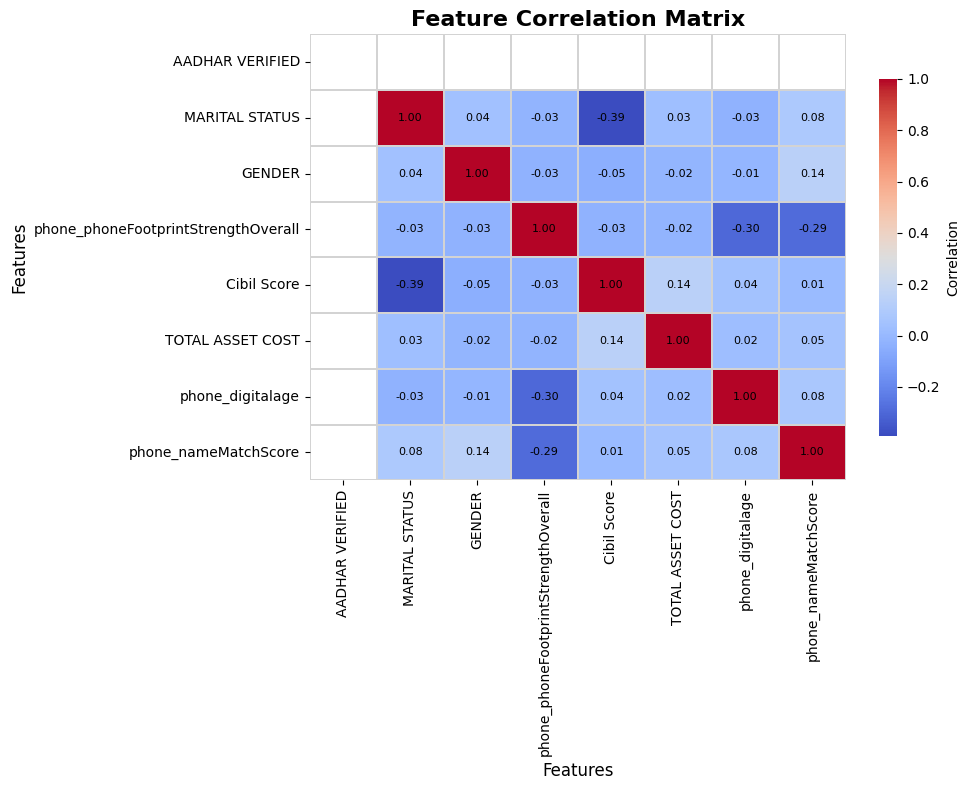

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))  # Adjust size for better visibility

# Calculate the correlation matrix
cor = X.corr()

# Create the heatmap with minimalistic design
sns.heatmap(
    cor,
    annot=True,  # Show correlation values on the heatmap
    cmap='coolwarm',  # Simple color map for the heatmap
    fmt='.2f',  # Format for the annotation text
    linewidths=0.3,  # Minimal width of the lines separating the cells
    linecolor='lightgrey',  # Light color for the lines separating the cells
    cbar_kws={
        'shrink': .8,  # Shrink color bar for better fit
        'label': 'Correlation'  # Label for the color bar
    },
    annot_kws={"size": 8, "color": "black"}  # Smaller, minimal annotation text
)

# Add plot title and axis labels
plt.title('Feature Correlation Matrix', size=16, weight='bold')  # Title of the heatmap
plt.xlabel('Features', size=12)  # X-axis label
plt.ylabel('Features', size=12)  # Y-axis label

# Remove unnecessary grid lines
plt.grid(False)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:
# Get the absolute value of the correlation
cor_target = abs(X.corrwith(Y))

# Select highly correlated features (threshold = 0.02)
highly_correlated_features = cor_target[cor_target > 0.02]

# Collect the names of the features
names = highly_correlated_features.index.tolist()

# Display the results
print("Highly correlated features:")
print(names)

Highly correlated features:
['MARITAL STATUS', 'GENDER', 'Cibil Score', 'TOTAL ASSET COST', 'phone_digitalage']


In [ ]:
# Evaluate the model with new features
strong_features_eval_df = evaluate_model_on_features(X[names], Y)
strong_features_eval_df.index = ['Strong features']

# Append to results and display
results = pd.concat([results, strong_features_eval_df], ignore_index=True)
results.head()

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
0,0.8485,0.817462,0.869099,0.910112,0.889133,8
1,0.8505,0.833300,0.890649,0.884644,0.887636,5


In [ ]:
def univariate_selection():
    """
    Performs univariate feature selection using the SelectKBest method with the f-classif scoring function.

    Args:
        X: The feature matrix.
        Y: The target variable.

    Returns:
        A list of feature names selected by the univariate selection process.
    """

    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=123)

    # Normalize all features of the train and test datasets
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Select top 5 features based on f-test
    selector = SelectKBest(f_classif, k=5)

    # Fit to scaled data, then transform it
    X_new = selector.fit_transform(X_train_scaled, Y_train)

    # Get selected feature indices
    feature_idx = selector.get_support()

    # Print the results
    for name, included in zip(X.columns, feature_idx):
        print("%s: %s" % (name, included))

    # Extract selected feature names
    feature_names = X.columns[feature_idx]

    return feature_names

In [ ]:
univariate_feature_names = univariate_selection()

AADHAR VERIFIED: False
MARITAL STATUS: True
GENDER: True
phone_phoneFootprintStrengthOverall: False
Cibil Score: True
TOTAL ASSET COST: True
phone_digitalage: True
phone_nameMatchScore: False


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Calculate and check model metrics
univariate_eval_df = evaluate_model_on_features(X, Y)
univariate_eval_df.index = ['F-test']

# Append to results and display
results = pd.concat([results, univariate_eval_df], ignore_index=True)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
0,0.8485,0.817462,0.869099,0.910112,0.889133,8
1,0.8505,0.833300,0.890649,0.884644,0.887636,5
2,0.8485,0.817462,0.869099,0.910112,0.889133,8


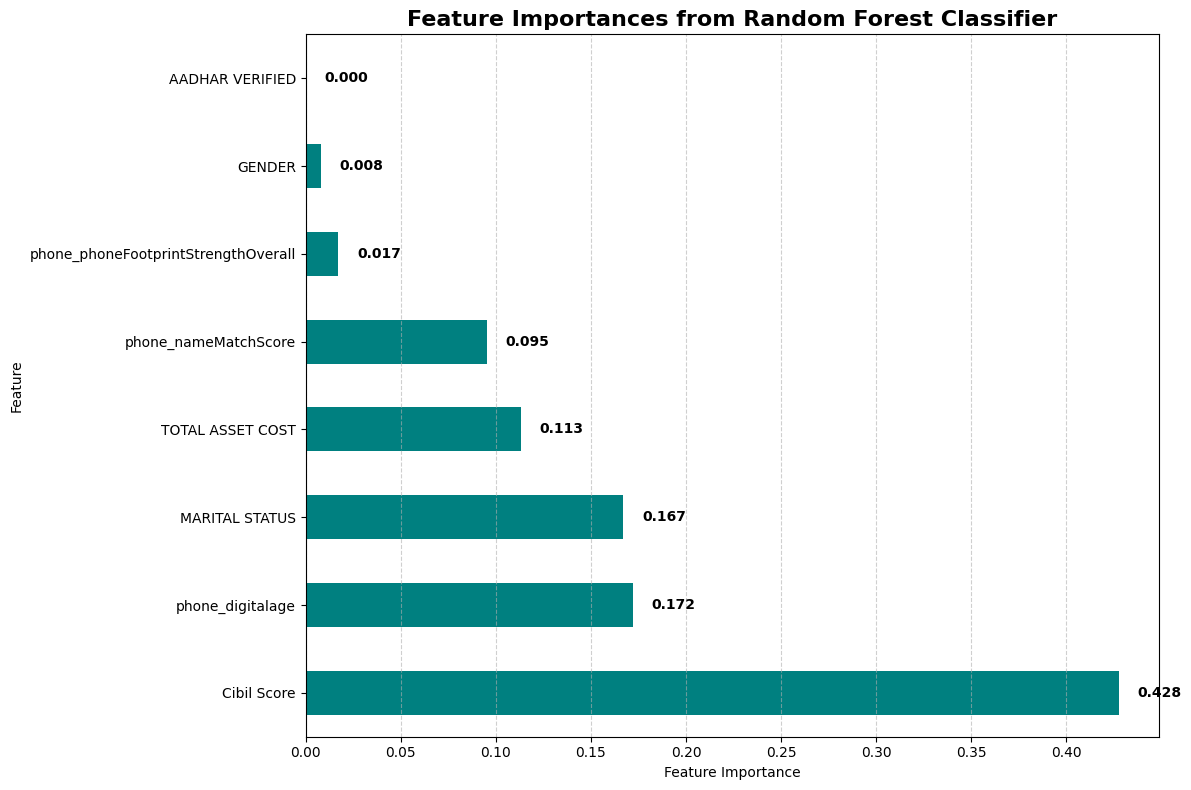

Selected features based on importance threshold (0.013):
Index(['MARITAL STATUS', 'phone_phoneFootprintStrengthOverall', 'Cibil Score',
       'TOTAL ASSET COST', 'phone_digitalage', 'phone_nameMatchScore'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

def feature_importances_from_tree_based_model(X, Y, test_size=0.2, random_state=123):
    """
    Calculates feature importances from a Random Forest Classifier model.

    Args:
        X (pandas.DataFrame): The input features.
        Y (pandas.Series): The target variable.
        test_size (float, optional): The proportion of data to use for the test set. Defaults to 0.2.
        random_state (int, optional): Seed for random number generation. Defaults to 123.

    Returns:
        sklearn.ensemble.RandomForestClassifier: The fitted Random Forest Classifier model.
        pandas.Index: The feature names.
    """

    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, random_state=random_state)

    # Standardize features (assuming numerical features)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define and fit the Random Forest Classifier model
    model = RandomForestClassifier(random_state=random_state)
    model.fit(X_train_scaled, Y_train)

    # Plot feature importance
    plt.figure(figsize=(12, 8))  # Increase figure size for better readability
    feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    feat_importances.plot(kind='barh', color='teal')  # Use a modern color for bars

    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances from Random Forest Classifier", fontsize=16, weight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines for better visualization

    # Annotate bars with importance values
    for index, value in enumerate(feat_importances):
        plt.text(value + 0.01, index, f"{value:.3f}", va='center', fontsize=10, color='black', weight='bold')

    plt.tight_layout()
    plt.show()

    return model, X.columns

def select_features_from_model(model, feature_names, threshold=0.013):
    """
    Selects features based on importance from a fitted model.

    Args:
        model (sklearn.base.Transformer): The fitted model from which to select features.
        feature_names (pandas.Index): The names of the features.
        threshold (float, optional): The minimum importance threshold for feature selection. Defaults to 0.013.

    Returns:
        list: A list of selected feature names.
    """

    selector = SelectFromModel(model, prefit=True, threshold=threshold)
    feature_idx = selector.get_support()
    feature_names_selected = feature_names[feature_idx]

    return feature_names_selected

# Assuming you have your data in X and Y variables
model, feature_names = feature_importances_from_tree_based_model(X, Y)
selected_feature_names = select_features_from_model(model, feature_names)

print("Selected features based on importance threshold (0.013):")
print(selected_feature_names)


In [ ]:
def run_rfe():

    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the model
    model = RandomForestClassifier(criterion='entropy', random_state=47)

    # Wrap RFE around the model
    rfe = RFE(model, n_features_to_select=20)

    # Fit RFE
    rfe = rfe.fit(X_train_scaled, Y_train)
    feature_names = X.columns[rfe.get_support()]

    return feature_names

rfe_feature_names = run_rfe()

In [ ]:
# Calculate and check model metrics
rfe_eval_df = evaluate_model_on_features(X[rfe_feature_names], Y)
rfe_eval_df.index = ['RFE']

# Append to results and display
results = pd.concat([results, rfe_eval_df], ignore_index=True)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
0,0.8485,0.817462,0.869099,0.910112,0.889133,8
1,0.8505,0.833300,0.890649,0.884644,0.887636,5
2,0.8485,0.817462,0.869099,0.910112,0.889133,8
3,0.8485,0.817462,0.869099,0.910112,0.889133,8
4,0.8485,0.817462,0.869099,0.910112,0.889133,8
5,0.8485,0.817462,0.869099,0.910112,0.889133,8
6,0.8485,0.817462,0.869099,0.910112,0.889133,8


In [ ]:
# Calculate and check model metrics
feat_imp_eval_df = evaluate_model_on_features(X[feature_imp_feature_names], Y)
feat_imp_eval_df.index = ['Feature Importance']

# Append to results and display
results = pd.concat([results, rfe_eval_df], ignore_index=True)
results.head(n=10)

,Accuracy,ROC,Precision,Recall,F1 Score,Feature Count
0,0.8485,0.817462,0.869099,0.910112,0.889133,8
1,0.8505,0.833300,0.890649,0.884644,0.887636,5
2,0.8485,0.817462,0.869099,0.910112,0.889133,8
3,0.8485,0.817462,0.869099,0.910112,0.889133,8
4,0.8485,0.817462,0.869099,0.910112,0.889133,8


In [ ]:
def run_l1_regularization():

    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)

    # All features of dataset are float values. You normalize all features of the train and test dataset here.
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Select L1 regulated features from LinearSVC output
    selection = SelectFromModel(LinearSVC(C=1, penalty='l1', dual=False))
    selection.fit(X_train_scaled, Y_train)

    feature_names = X.columns[(selection.get_support())]

    return feature_names

l1reg_feature_names = run_l1_regularization()

In [ ]:
# TENSORFLOW -DL

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import joblib
import matplotlib.pyplot as plt


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
model = Sequential([
    # Input layer: 128 neurons, accepting input shape (number of features)
    Dense(128, input_shape=(X_train_split.shape[1],)),
    # Batch normalization to standardize inputs
    BatchNormalization(),
    # ReLU activation function for non-linearity
    Activation('relu'),
    # Dropout for regularization, preventing overfitting
    Dropout(0.2),

    # Hidden layer 1: 256 neurons
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Hidden layer 2: 64 neurons
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    # Hidden layer 3: 16 neurons
    Dense(16),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.1),

    # Output layer: 1 neuron, sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='RMSprop',
    metrics=['accuracy']
)


In [ ]:

# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

In [ ]:
# Train the model using the early stopping callback
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7709 - loss: 0.4821 - val_accuracy: 0.8463 - val_loss: 0.3668
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8376 - loss: 0.3590 - val_accuracy: 0.8507 - val_loss: 0.3248
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8522 - loss: 0.3385 - val_accuracy: 0.8508 - val_loss: 0.3183
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8388 - loss: 0.3437 - val_accuracy: 0.8545 - val_loss: 0.3140
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8455 - loss: 0.3309 - val_accuracy: 0.8522 - val_loss: 0.3110
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8498 - loss: 0.3298 - val_accuracy: 0.8553 - val_loss: 0.3107
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8417 - loss: 0.3364 - val_accuracy: 0.8538 - val_loss: 0.3150
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8478 - loss: 0.3308 - val_accuracy: 0.

In [ ]:
# 5. Evaluate Model
val_preds = (model.predict(X_val) > 0.5).astype("int32")
print("Classification Report on Validation Data:\n", classification_report(y_val, val_preds))

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80      1995
           1       0.91      0.87      0.89      4005

    accuracy                           0.86      6000
   macro avg       0.84      0.85      0.84      6000
weighted avg       0.86      0.86      0.86      6000



In [ ]:
# 6. Make Predictions
test_preds = (model.predict(X_test[:len(test)]) > 0.5).astype("int32")

test['Prediction'] = test_preds



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Save predictions to CSV
test[['UID', 'Prediction']].to_csv('predictions.csv', index=False)

In [ ]:
import sklearn.preprocessing

#save the model for future use
model.save('model.h5')


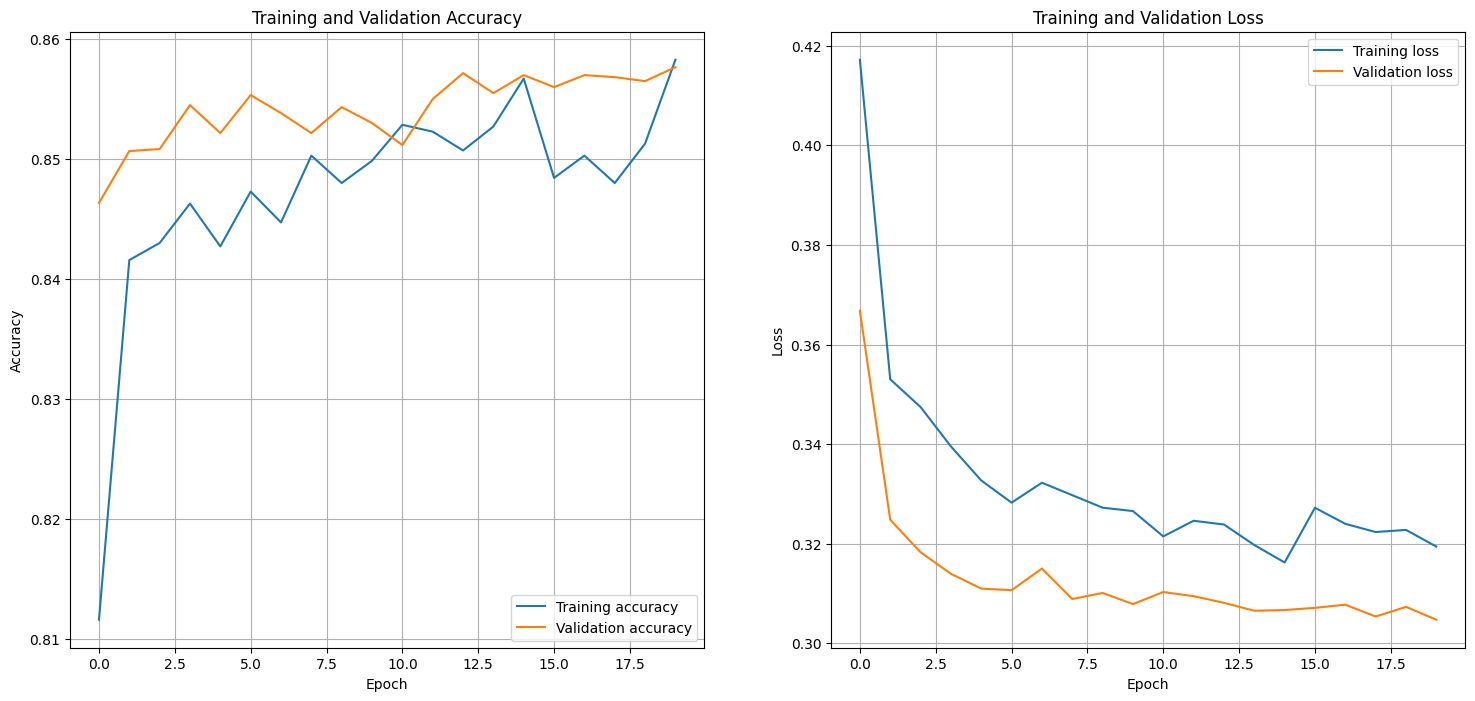

In [ ]:
# Import libraries (assumed)
import matplotlib.pyplot as plt

# Function to plot training history
def plot_history(history):
  """
  This function takes a 'history' object, typically generated by fitting a model
  using libraries like Keras or TensorFlow, and plots the training and validation
  accuracy and loss curves.

  Args:
      history: A dictionary containing the training history. It should have keys
               like 'accuracy', 'val_accuracy', 'loss', and 'val_loss'.
  """

  # Configure the figure size
  plt.figure(figsize=(18, 8))  # Adjust the figure size for better readability

  # Accuracy subplot
  plt.subplot(1, 2, 1)  # Create a subplot occupying 1 row, 2 columns, position 1

  # Plot training and validation accuracy
  plt.plot(history.history['accuracy'], label='Training accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation accuracy')

  # Set labels and title
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')  # Place the legend in the lower right corner
  plt.title('Training and Validation Accuracy')
  plt.grid(True)  # Add grid lines for better visualization

  # Loss subplot
  plt.subplot(1, 2, 2)  # Create a subplot occupying 1 row, 2 columns, position 2

  # Plot training and validation loss
  plt.plot(history.history['loss'], label='Training loss')
  plt.plot(history.history['val_loss'], label='Validation loss')

  # Set labels and title
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')  # Place the legend in the upper right corner
  plt.title('Training and Validation Loss')
  plt.grid(True)  # Add grid lines for better visualization

  # Display the plot
  plt.show()

plot_history(history)
